In [18]:
library(readxl)
library(rstatix)
library(ggpubr)

In [10]:
Optimal_policy = read_excel("D://Amar//Codes_Data//Optimal_policy.xlsx")

In [12]:
Optimal_policy

id,task_duration_controlled,feedback_type,Coherency,reward_rate
<dbl>,<chr>,<chr>,<chr>,<dbl>
1,fixed_time,Medium,Low_Coherency,0.9620027
2,fixed_time,Medium,Low_Coherency,0.8881571
3,fixed_time,Medium,Low_Coherency,0.9072598
4,fixed_time,Medium,Low_Coherency,0.9210069
5,fixed_time,Medium,Low_Coherency,0.9252177
6,fixed_time,Medium,Low_Coherency,0.9058739
7,fixed_time,Medium,Low_Coherency,0.8833553
8,fixed_time,Medium,Low_Coherency,0.9104439
9,fixed_time,Medium,Low_Coherency,0.9770211


In [11]:
Optimal_policy = Optimal_policy %>% gather (key = "Coherency", value = "reward_rate", Low_Coherency, High_Coherency)

In [15]:
Optimal_policy %>% group_by(task_duration_controlled, feedback_type	, Coherency) %>% get_summary_stats(reward_rate, type = "mean_sd")

task_duration_controlled,feedback_type,Coherency,variable,n,mean,sd
<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
fixed_time,High,High_Coherency,reward_rate,10,0.930,0.025
fixed_time,High,Low_Coherency,reward_rate,10,0.922,0.031
fixed_time,Low,High_Coherency,reward_rate,10,0.909,0.031
fixed_time,Low,Low_Coherency,reward_rate,10,0.884,0.020
fixed_time,Medium,High_Coherency,reward_rate,10,0.919,0.023
fixed_time,Medium,Low_Coherency,reward_rate,10,0.923,0.031
fixed_trial,High,High_Coherency,reward_rate,10,0.906,0.041
fixed_trial,High,Low_Coherency,reward_rate,10,0.942,0.032
fixed_trial,Low,High_Coherency,reward_rate,10,0.861,0.037


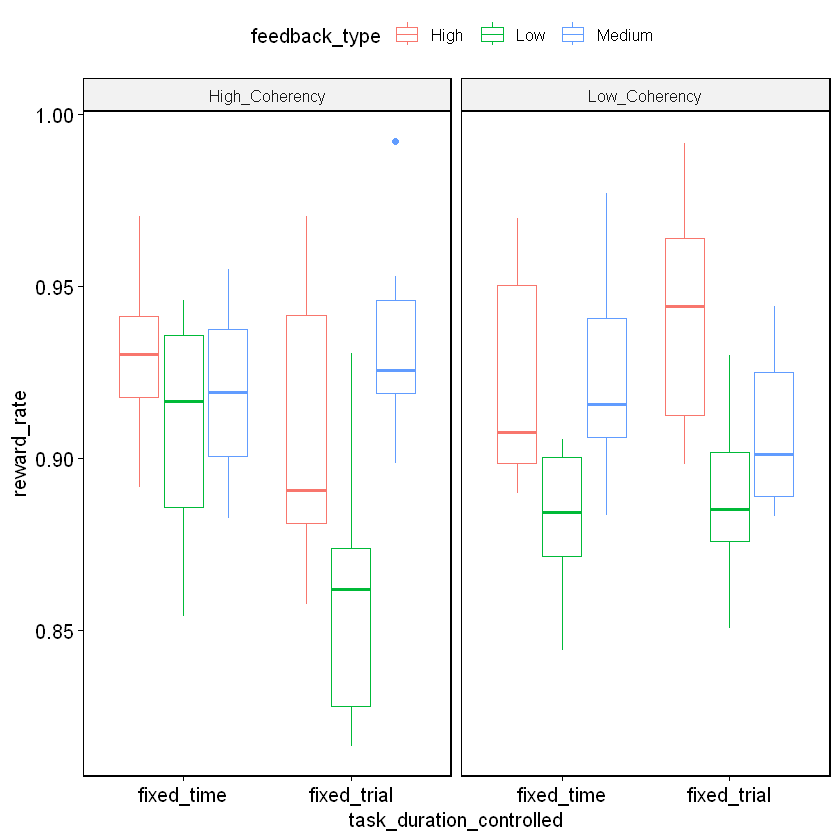

In [19]:
ggboxplot(Optimal_policy, x = "task_duration_controlled", y = "reward_rate", color = "feedback_type", facet.by = "Coherency")

# همگنی واریانس را با لوون در گروپ بای متغیر درون گروهی رو میاریم و در داخل لوون بین گروهی ها رو میاریم

In [20]:
Optimal_policy %>% group_by(Coherency) %>% levene_test(reward_rate ~ task_duration_controlled * feedback_type)

Coherency,df1,df2,statistic,p
<chr>,<int>,<int>,<dbl>,<dbl>
High_Coherency,5,54,0.7218645,0.6099166
Low_Coherency,5,54,0.9738829,0.4421133


In [21]:
Optimal_policy %>% group_by(task_duration_controlled, feedback_type	, Coherency) %>% identify_outliers(reward_rate)

task_duration_controlled,feedback_type,Coherency,id,reward_rate,is.outlier,is.extreme
<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>
fixed_trial,Medium,High_Coherency,36,0.9920994,TRUE,FALSE


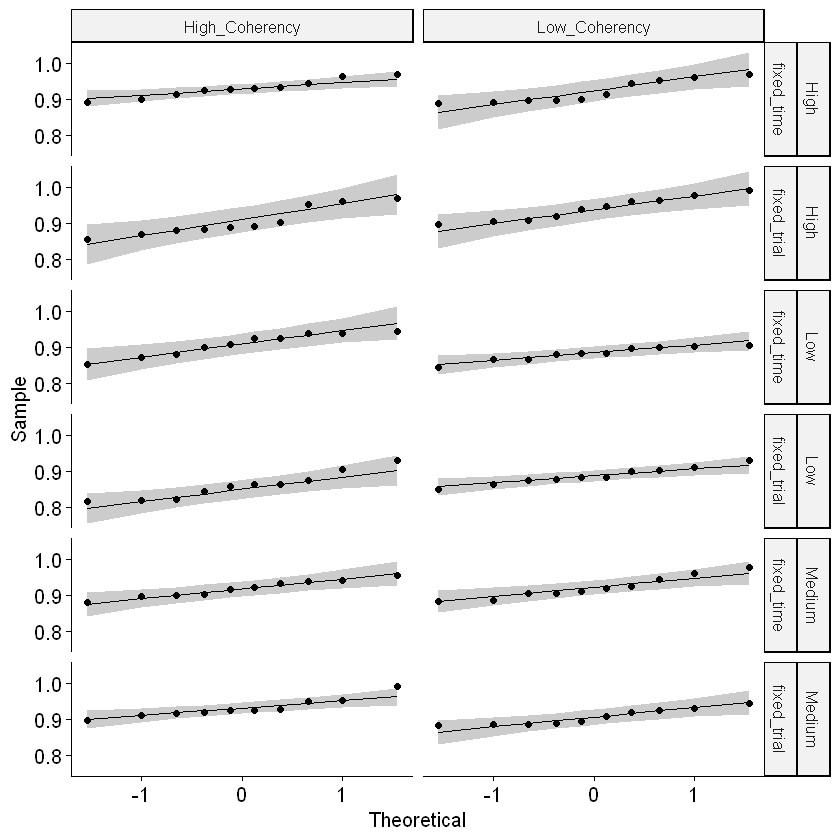

In [22]:
ggqqplot(Optimal_policy, "reward_rate") + facet_grid(feedback_type + task_duration_controlled ~ Coherency)

In [23]:
Optimal_policy %>% group_by(task_duration_controlled, feedback_type	, Coherency) %>% shapiro_test(reward_rate)

task_duration_controlled,feedback_type,Coherency,variable,statistic,p
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
fixed_time,High,High_Coherency,reward_rate,0.9578823,0.76148210
fixed_time,High,Low_Coherency,reward_rate,0.8478101,0.05470366
fixed_time,Low,High_Coherency,reward_rate,0.9252530,0.40285462
fixed_time,Low,Low_Coherency,reward_rate,0.9152651,0.31914862
fixed_time,Medium,High_Coherency,reward_rate,0.9657809,0.84921174
fixed_time,Medium,Low_Coherency,reward_rate,0.9418350,0.57360660
fixed_trial,High,High_Coherency,reward_rate,0.8652561,0.08798017
fixed_trial,High,Low_Coherency,reward_rate,0.9463818,0.62593436
fixed_trial,Low,High_Coherency,reward_rate,0.9304106,0.45194336


In [24]:
anova_test(data = Optimal_policy, dv = reward_rate, wid= id, within = Coherency, between = c(task_duration_controlled, feedback_type))

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,task_duration_controlled,1,54,2.406,1.27e-01,,0.023000
2,feedback_type,2,54,21.166,1.63e-07,*,0.288000
3,Coherency,1,54,0.063,8.03e-01,,0.000564
4,task_duration_controlled:feedback_type,2,54,1.554,2.21e-01,,0.029000
5,task_duration_controlled:Coherency,1,54,4.730,3.40e-02,*,0.041000
6,feedback_type:Coherency,2,54,1.821,1.72e-01,,0.032000
7,task_duration_controlled:feedback_type:Coherency,2,54,6.101,4.00e-03,*,0.098000
